# Problem 1

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
# Load the data
data = pd.read_csv('problem1.csv')['x']

# Fit a Normal distribution to the data
mu, std = stats.norm.fit(data)

# Fit a t-distribution to the data
nu, mu_t, std_t = stats.t.fit(data)

# Calculate the VaR and ES for the Normal distribution
alpha = 0.05 # 95% confidence level
VaR_norm = -stats.norm.ppf(alpha, loc=mu, scale=std)
#ES_norm = mu + std * stats.norm.pdf(stats.norm.ppf(alpha, loc=mu, scale=std)) / (1-alpha)
es_set = []
for i in data:
    if i <= - VaR_norm:
        es_set.append(i)
ES_norm = -(np.mean(es_set))


# Calculate the VaR and ES for the t-distribution
VaR_t = -stats.t.ppf(alpha, nu, loc=mu_t, scale=std_t)
tau_inv = stats.t.ppf(alpha, nu, loc=mu_t, scale=std_t)
tau = stats.t.pdf(tau_inv, nu, loc=mu_t, scale=std_t)
#ES_t = mu + std_t * (nu + tau_inv**2) / (nu-1) * tau / (1-alpha)
es_set2 = []
for i in data:
    if i <= - VaR_t:
        es_set2.append(i)
ES_t = -np.mean(es_set2)


# Print the results
print('Normal distribution:')
print('VaR:', round(VaR_norm, 5))
print('ES:', round(ES_norm, 5))

print('t-distribution:')
print('VaR:', round(VaR_t, 5))
print('ES:', round(ES_t, 5))


Normal distribution:
VaR: 0.08125
ES: 0.12011
t-distribution:
VaR: 0.07648
ES: 0.11678


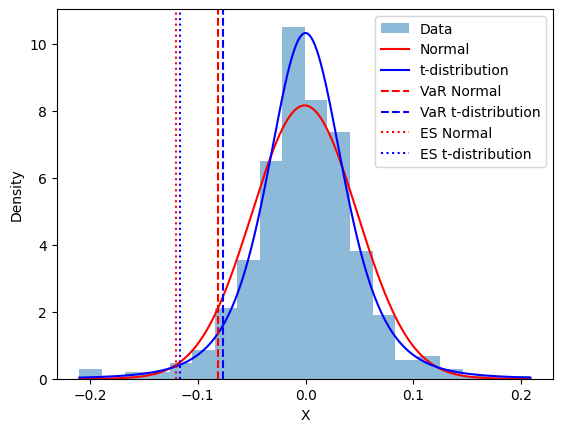

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Set up the plot
fig, ax = plt.subplots()

# Create the histogram of the data
ax.hist(data, bins=20, density=True, alpha=0.5, label='Data')

# Create the density functions for the Normal and t-distributions
x = np.linspace(data.min(), data.max(), 1000)
pdf_norm = stats.norm.pdf(x, loc=mu, scale=std)
pdf_t = stats.t.pdf(x, nu, loc=mu_t, scale=std_t)

# Add the density functions to the plot
ax.plot(x, pdf_norm, 'r-', label='Normal')
ax.plot(x, pdf_t, 'b-', label='t-distribution')

# Add the VaR and ES values to the plot
ax.axvline(x=-VaR_norm, color='r', linestyle='--', label='VaR Normal')
ax.axvline(x=-VaR_t, color='b', linestyle='--', label='VaR t-distribution')
ax.axvline(x=-ES_norm, color='r', linestyle=':', label='ES Normal')
ax.axvline(x=-ES_t, color='b', linestyle=':', label='ES t-distribution')

# Set the labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.legend()

# Show the plot
plt.show()


# Problem 2

In [3]:
import sys
sys.path.append("/Users/ansel_li/Fintech545/public")

In [4]:
import pandas as pd

from risk_mgmt import calc_return, cov

In [5]:
# Covariance matrix test

data = pd.read_csv("DailyPrices.csv")
data_return = calc_return.return_calculate(data)
data_return.head()

/Users/ansel_li/Fintech545/public/risk_mgmt/calc_return.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,2/15/2022 0:00,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,2/16/2022 0:00,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,2/17/2022 0:00,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,2/18/2022 0:00,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,2/22/2022 0:00,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605


In [6]:
data_return.drop('Date', axis=1, inplace=True)
data_return

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [7]:
lamb = 0.94
cov =cov.ew_covar(data_return, lamb)
cov

array([[ 1.26482714e-04,  1.60498225e-04,  2.11666910e-04, ...,
         1.81397640e-04,  1.20191099e-04,  1.21415100e-05],
       [ 1.60498225e-04,  3.52996482e-04,  2.69735204e-04, ...,
         2.55929668e-04,  1.51299428e-04, -6.50908573e-06],
       [ 2.11666910e-04,  2.69735204e-04,  4.97465537e-04, ...,
         3.07984284e-04,  1.52281378e-04, -3.78397686e-05],
       ...,
       [ 1.81397640e-04,  2.55929668e-04,  3.07984284e-04, ...,
         7.84934935e-04,  1.71100484e-04, -1.17601047e-05],
       [ 1.20191099e-04,  1.51299428e-04,  1.52281378e-04, ...,
         1.71100484e-04,  2.50910983e-04,  7.84124017e-06],
       [ 1.21415100e-05, -6.50908573e-06, -3.78397686e-05, ...,
        -1.17601047e-05,  7.84124017e-06,  1.26941238e-04]])

In [8]:
#2. Non PSD fixes for correlation matrices
n = 500
sigma = np.matrix(np.full((n, n), 0.9))
np.fill_diagonal(sigma, 1)
sigma[0, 1] = 0.7357
sigma[1, 0] = 0.7357

from risk_mgmt.PSD_fix import near_psd, higham, chol_psd, is_psd
# Make non pd matrix psd
after_near = near_psd(sigma)
after_hig = higham(sigma)

# test if near_psd and higham function success transfer to psd correlation matrix
#test1 = chol_psd(after_near)
print(is_psd(after_hig))
print(is_psd(after_near))

True
True


In [9]:
# SIMULATION
from risk_mgmt.simulation import direct_simulation, simulate_pca
direct_simulation(cov, 10000)

array([[-1.62975588e-02, -1.04602162e-02, -4.61074713e-03, ...,
         2.52084239e-03,  1.44378940e-02,  1.35358004e-02],
       [-3.15944841e-02,  1.63826779e-02, -2.26050580e-02, ...,
         6.60046197e-03,  3.41702130e-02,  1.97564064e-02],
       [-4.66363193e-02, -1.40060710e-02,  6.69746480e-03, ...,
         1.97009874e-02,  2.06327602e-02,  2.25514637e-02],
       ...,
       [-1.24854756e-02,  6.64816785e-03, -7.01233946e-03, ...,
         3.45497596e-02,  3.25453663e-03, -9.44003371e-04],
       [-2.23883942e-02, -8.89196721e-03,  6.72165380e-03, ...,
         5.19544002e-04,  2.87211899e-02,  1.57473217e-02],
       [ 2.76940775e-02, -1.54655420e-02, -8.88674625e-03, ...,
        -2.15525454e-02,  3.50924702e-05,  2.27167441e-02]])

In [10]:
simulate_pca(cov, 10000, 0.75)

Simulating with 7 PC Factors: 76.44 % total variance explained


array([[ 0.00154827,  0.00356878, -0.0034953 , ..., -0.00011443,
        -0.00178296,  0.0167788 ],
       [-0.00697646,  0.01293518,  0.00104114, ..., -0.01169568,
        -0.01092921,  0.01513235],
       [-0.00923688,  0.00410567, -0.00150618, ...,  0.00955767,
        -0.00552941,  0.01441858],
       ...,
       [-0.037976  ,  0.00361215, -0.01129498, ...,  0.00180272,
         0.00356816,  0.03386997],
       [ 0.00943877,  0.00977762, -0.00822581, ..., -0.00405807,
         0.00130334,  0.01604464],
       [ 0.00832214, -0.0060162 , -0.00030645, ..., -0.00351436,
         0.00246697,  0.01660997]])

In [11]:
#VaR methods
data = pd.read_csv("DailyPrices.csv", index_col=0)
from risk_mgmt.VaR import normal_var, ewcov_normal_var, MLE_t_var, historic_var
cov = cov - np.mean(cov)
print(normal_var(cov))
print(historic_var(cov))

0.00024633349986217227
0.00014999402651400234


# Problem 3

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
from risk_mgmt.calc_return import get_portfolio_price
from risk_mgmt.simulation import simulate_pca
from risk_mgmt.VaR import calculate_var, calculate_es

# Load data
portfolio = pd.read_csv("Portfolio.csv")
dailyPrice = pd.read_csv("DailyPrices.csv").iloc[:, 1:]

portfolios = ["A", "B", "C", "ALL"]

for portfolio_name in portfolios:

    # Calculate portfolio value, return, and holdings
    pv, port_return, holdings = get_portfolio_price(portfolio, dailyPrice, portfolio_name)

    # Calculate parameters and cdf for each stock in the portfolio
    parameters = []
    returns_cdf = pd.DataFrame()
    for stock in port_return.columns:

        params = t.fit(port_return[stock] - port_return[stock].mean())
        parameters.append(params)

        returns_cdf[stock] = t.cdf(port_return[stock], df=params[0], loc=params[1], scale=params[2])

    # Generate correlated samples using PCA
    np.random.seed(101)
    spearman_corr = returns_cdf.corr(method='spearman')
    sim_sample = simulate_pca(spearman_corr, 10000).T
    sim_sample = pd.DataFrame(sim_sample, columns=port_return.columns)

    # Calculate simulated returns
    cdf_sim_sample = pd.DataFrame()
    sim_returns = pd.DataFrame()
    for i, stock in enumerate(sim_sample.columns):
        cdf_sim_sample[stock] = norm.cdf(sim_sample[stock], loc=0, scale=1)
        sim_returns[stock] = t.ppf(cdf_sim_sample[stock], df=parameters[i][0], loc=parameters[i][1], scale=parameters[i][2])

    # Calculate simulated prices and VaR/ES
    sim_prices = np.dot((1 + sim_returns) * pv, holdings["Holding"])
    mean_port = np.sum(np.dot(pv, holdings["Holding"]))
    VaR_T = calculate_var(sim_prices, mean=mean_port)
    ES_T = calculate_es(mean_port - sim_prices)

    # Print results
    print(f"For Portfolio {portfolio_name}, the VaR is: {VaR_T}")
    print(f"For Portfolio {portfolio_name}, the ES is: {ES_T}\n")


Simulating with 22 PC Factors: 95.01 % total variance explained
For Portfolio A, the VaR is: 7940.895693258732
For Portfolio A, the ES is: 10754.943321283818

Simulating with 23 PC Factors: 95.47 % total variance explained
For Portfolio B, the VaR is: 6711.417545498523
For Portfolio B, the ES is: 9044.418040979726

Simulating with 23 PC Factors: 95.27 % total variance explained
For Portfolio C, the VaR is: 5600.537946650584
For Portfolio C, the ES is: 7773.806940833019

Simulating with 52 PC Factors: 95.03 % total variance explained
For Portfolio ALL, the VaR is: 19910.804313675384
For Portfolio ALL, the ES is: 27243.953659470422

